In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%pylab inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

Populating the interactive namespace from numpy and matplotlib


#  Read the data

In [121]:
#設定data
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['class'] = iris.target

In [ ]:
#path = ''
#col = []
#df = pd.read_csv(path, columns=col, encoding='')

In [125]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Create the training set/ validation set/ testing set

In [126]:
#拆分變數x 與 target_y
x,y = df, df.pop('class')

In [127]:
#拆分Training set, Validation set, Testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,random_state=42)

# Model Tunning

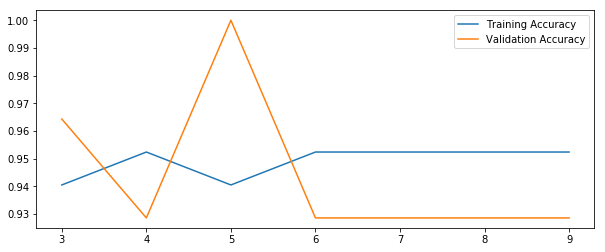

In [128]:
train_accuracy = []
valid_accuracy = []
k_neighbor = []

max_k = 9

for n in range(3,max_k+1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    k_neighbor.append(n)
    train_accuracy.append(round(knn.score(x_train, y_train),5))
    valid_accuracy.append(round(knn.score(x_valid, y_valid),5))

plt.figure(figsize=(10,4))
plt.plot(k_neighbor, train_accuracy, label='Training Accuracy')
plt.plot(k_neighbor, valid_accuracy, label='Validation Accuracy')
plt.legend()

In [129]:
print('The best k is: {}'.format(k_neighbor[valid_accuracy.index(max(valid_accuracy))]))
print('KNN training score is: {}'.format(train_accuracy[valid_accuracy.index(max(valid_accuracy))]))
print('KNN validation score is: {}'.format(valid_accuracy[valid_accuracy.index(max(valid_accuracy))]))

The best k is: 5
KNN training score is: 0.94048
KNN validation score is: 1.0


# Model Learning

In [137]:
knn_model = KNeighborsClassifier(n_neighbors=k_neighbor[valid_accuracy.index(max(valid_accuracy))])
knn_model.fit(x_train,y_train)
print('Best K is: {}'.format(k_neighbor[valid_accuracy.index(max(valid_accuracy))]))
print('KNN training accuracy = {}%'.format(round(knn_model.score(x_train, y_train),4)*100))
print('KNN validation accuracy = {}%'.format(round(knn_model.score(x_valid, y_valid),4)*100))
print('KNN testing accuracy = {}%'.format(round(knn_model.score(x_test,y_test),4)*100))

Best K is: 5
KNN training accuracy = 94.05%
KNN validation accuracy = 100.0%
KNN testing accuracy = 100.0%


# Make Prediction

In [ ]:
prediction = knn_model.predict()